# Homework #14: K-means
---

**Description**: In this week's homework, you will implement your own k-means model on the Pokemon dataset. You will be clustering the data of Pokemons on the basis of its characteristics.


**Dataset Description:**
This data set includes 898 Pokemon, 1072 including alternate forms, including their number, name, first and second type, the stat total and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed, generation, and legendary status. The attributes of each Pokemon are as follows:

* `Number`: The ID for each pokemon

* `Name`: The name of each pokemon

* `Type 1`: Each pokemon has a type, this determines weakness/resistance to attacks

* `Type 2`: Some pokemon are dual type and have 2

* `Total`: Sum of all stats that come after this, a general guide to how strong a pokemon is

* `HP`: Hit points, or health, defines how much damage a pokemon can withstand before fainting

* `Attack`: The base modifier for normal attacks (eg. Scratch, Punch)

* `Defense`: The base damage resistance against normal attacks

* `SP Atk`: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

* `SP Def`: Special defense, the base damage resistance against special attacks

* `Speed`: Determines which pokemon attacks first each round

* `Generation`: The generation of games where the pokemon was first introduced

* `Legendary`: Some pokemon are much rarer than others, and are dubbed "legendary"

<br>


**Source:** [data.world](https://data.world/data-society/pokemon-with-stats)


**Cheat sheet:** [K-Means Cheat sheet](https://docs.google.com/document/d/1qjofYW__LJs2-ajXYipA6oiF00ky4ebXdCYQAFyPtSg/edit?usp=sharing)

**Run the code below before continuing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### **Step #1: Load the Pokemon Dataset**
**Run the following code before continuing:**



In [ ]:
url ="https://query.data.world/s/p4tnasnlximnov7fpjlu2msnmegyrb"
pokemon_df = pd.read_csv(url,  sep = ",")
pokemon_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


#### **Step #2: Create X**
We can observe that the given dataset has some categorical features. Clustering using categorical features is a bit more difficult than numeric features because of the absence of any natural order, high dimensionality and existence of subspace clustering. So for this project we will only work with numeric features of the given dataset. Run the following code and then create X.
```
new_pokemon_df = pokemon_df[['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation']]
```


In [ ]:
new_pokemon_df = pokemon_df[['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation']]

##### **Determine optimal cluster number with elbow method**

Before we continue, we are going to use an elbow plot to determing the optimal k for this model. Use the following code to help set up your plot.
*We will use `yellowbrick` library to implement elbow method.*

#####**Import `KElbowVisualizer` from `yellowbrick.cluster` and `kmeans` from `sklearn.cluster`.**

How to import `KElbowVisualizer`:
```
from yellowbrick.cluster import KElbowVisualizer
```

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 

#####**Set parameter `k = (4,12)` of `KElbowVisualizer` method. Fit, visualize and figure out the optimal value of `k`.**

This has been provided for you.

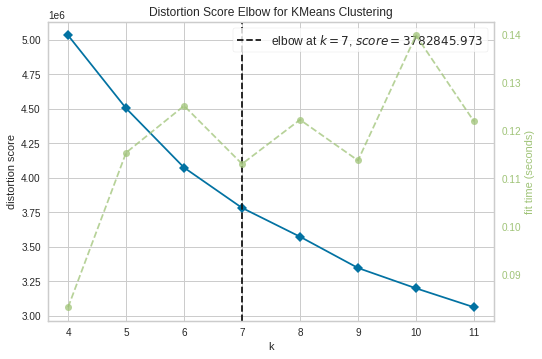

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,12))

#from sklearn.preprocessing import StandardScaler
X = new_pokemon_df.values
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show()

<br>

####***STOP!* Answer the following question under problem #6: What is the best k for this model?**

<br>

#### **Step #4: Import your model**

We will also be using standarization to make our model more accurate. Make sure to include the following line below:
```
from sklearn.preprocessing import StandardScaler
```

In [ ]:
from sklearn.preprocessing import StandardScaler
#X = new_pokemon_df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Step #5: Initialize your model and set hyperparameters**

Assign `n_clusters` the optimal value of `k` obtained  from the elbow method to define your KMeans model.

**Add an optional parameter as follows:**
```
random_state = 42
```
`random_state` allows reproducible results, so when you are looking at the answer key later, your results will *be the same as ours*, despite the random aspect. If you are interested in reading more, click [here](https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431).

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=42)

#### **Step #6: Fit your model and create a visual**

This dataset requires standardization. Be sure to standardize your data in this step.

Use the following to standardize:
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

Then pass in your scaled values to fit.

```python
y_pred = kmeans.fit_predict(X_std)
```

#####**Standardize the data before fitting it:**





In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#####**Now fit the standardized data using above defined model.**

*Use `fit_predict` on `X_std` to create `y`*

In [ ]:
y_pred = kmeans.fit_predict(X_scaled)

#### **[Optional Challenge] Visualize the results**
---
Use the features `attack` and  `defense` to visualize how well the clusters separate the data.

**NOTE:** You may have to experiment with different graphs. Since this model used several features, a good two-dimensional visual is difficult to create. 


#### **Step \#7 Calculate the Silhouette Score to test the accuracy of your model**


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('silhouette score: ', score)

silhouette score:  0.06108532027257252


<br>

####***STOP!* Answer the following question under problem #7: What is the approximate silhouette score?**

<br>

#### **Step \#8: Use the model**

Given the following values, predict in which cluster these Pokemon would fall.
1.  `total = 300`,	`hp = 50`, `attack = 40`,	`defense = 60`,	`sp_attack = 60`,	`sp_defense = 67`,	`speed = 40`,	`generation = 6`
2.  `total = 250`,	`hp = 40`, `attack = 60`,	`defense = 40`,	`sp_attack = 40`,	`sp_defense = 30`,	`speed = 70`,	`generation = 8`
3. `total = 500`,	`hp = 70`, `attack = 50`,	`defense = 75`,	`sp_attack = 80`,	`sp_defense = 80`,	`speed = 100`,	`generation = 6`


Use the `kmeans.predict([[]])` to complete this problem. 

####***Remember to standardize the data with the scaler you used in Step #6***

```
new_pokemon = np.array([[pokemon #1 data],[pokemon #2 data], [pokemon #3 data]])
new_scld = scaler.fit_transform(new_pokemon)
```


In [ ]:
new_pokemon = np.array([[300, 50, 40, 60, 60, 67, 40, 6],
                       [250, 40, 60, 40, 40, 30, 70, 8],
                       [500, 70, 50, 75, 80, 80, 100, 6]])
new_scaled = scaler.fit_transform(new_pokemon)

In [ ]:
kmeans.predict(scaler.transform(new_pokemon))

array([2, 3, 0], dtype=int32)

<br>

####**Answer the following question under problem #8: What number cluster is the first pokemon assigned to?**

####**Answer the following question under problem #9: What number cluster is the second pokemon assigned to?**

####**Answer the following question under problem #10: What number cluster is the third pokemon assigned to?**

---
© 2023 The Coding School, All rights reserved